In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from signal_src import generate_signal
from avgSquareError import avgSquareError

from signal_src import fs


In [ ]:
"""
Task 2.1.1
"""
x = generate_signal(4)  # Test signal x(n)
u = generate_signal(1)      # Reference signal u(n)
np.savetxt('task2-1.txt', np.array([x, u]), delimiter=';')

In [ ]:
"""
Task 2.1.2
"""
# Compute the Fourier Transforms
X = np.fft.fft(x)
U = np.fft.fft(u)
np.savetxt('task2-2.txt', np.array([X, U]), delimiter=';')


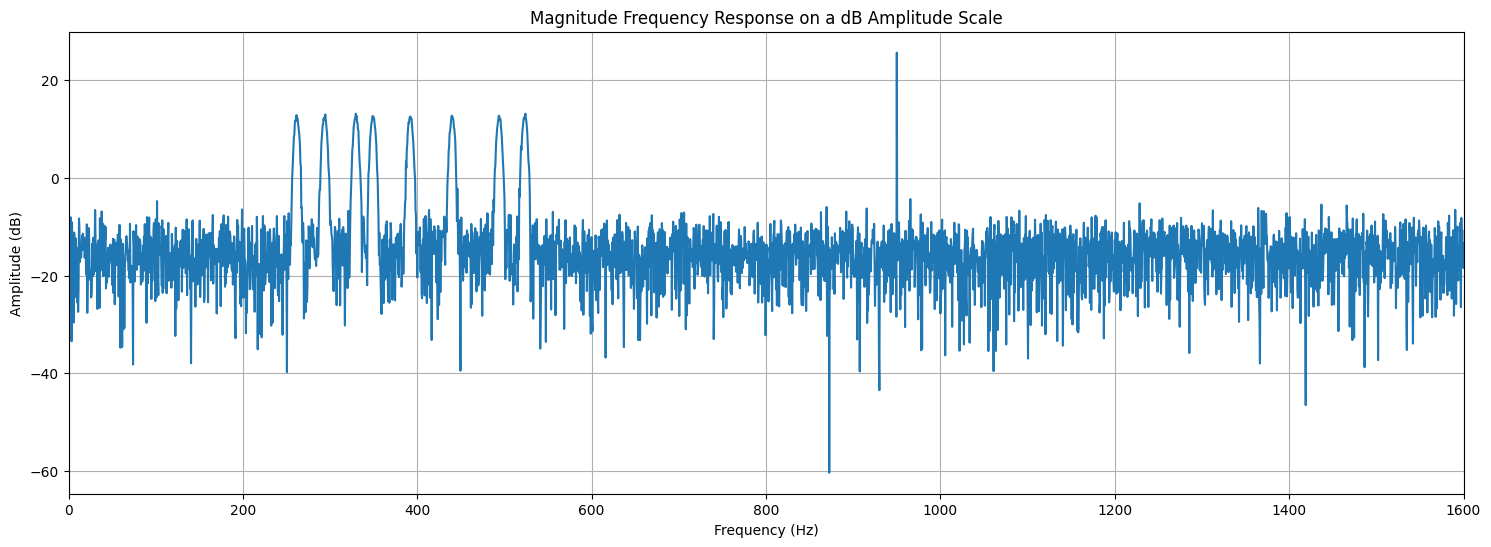

In [ ]:
"""
Task 2.1.3
"""
# Calculate the frequency axis
frequencies = np.arange(len(X)) / len(X) * fs

# Calculate the magnitude frequency response and convert to dB
magnitude_X = np.abs(X) / np.sqrt(len(X))
magnitude_X_dB = 20 * np.log10(magnitude_X)

# Plot the magnitude frequency response
plt.figure(figsize=(18, 6))
plt.plot(frequencies, magnitude_X_dB)
plt.title('Magnitude Frequency Response on a dB Amplitude Scale')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.xlim(0,0.2*fs)
plt.grid(True)
plt.savefig('task2-3.png')
plt.show()

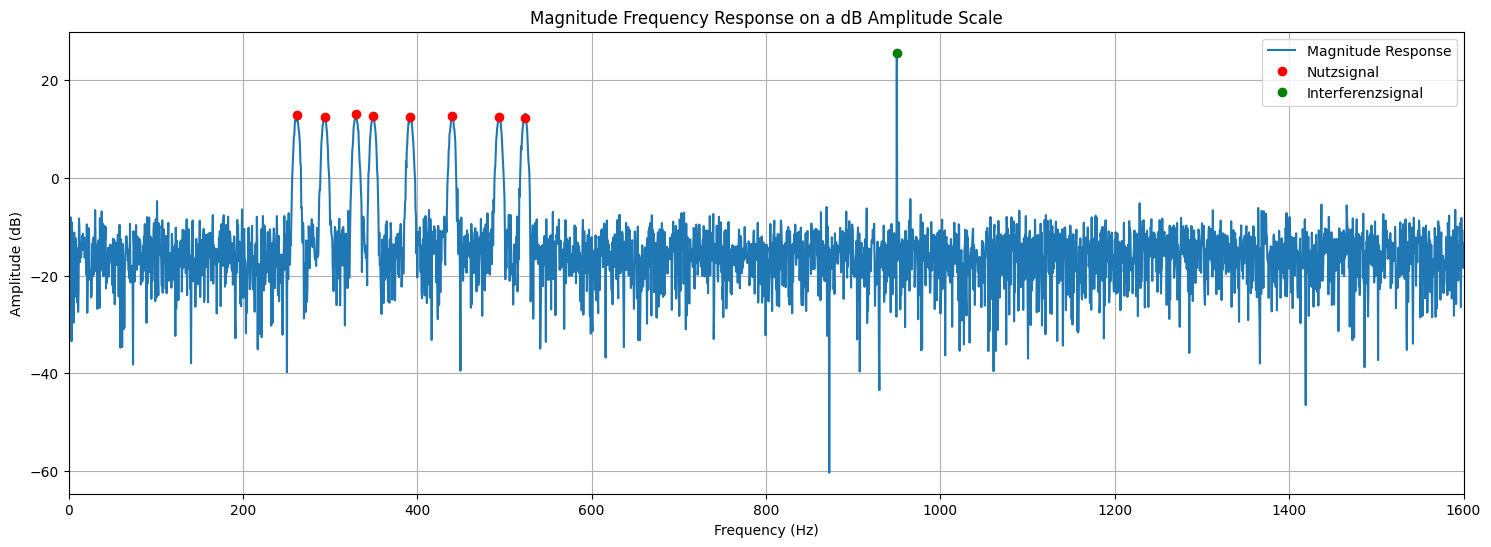

SNR: -14.53 dB
SIR: -3.95 dB
Nutzsignal-Frequency 261.6255653005986 Hz has an amplitude of 12.83816279695458 dB
Nutzsignal-Frequency 293.6647679174076 Hz has an amplitude of 12.371255103319225 dB
Nutzsignal-Frequency 329.6275569128699 Hz has an amplitude of 13.129479519519109 dB
Nutzsignal-Frequency 349.2282314330039 Hz has an amplitude of 12.601511366599908 dB
Nutzsignal-Frequency 391.99543598174927 Hz has an amplitude of 12.550416335334324 dB
Nutzsignal-Frequency 440.0 Hz has an amplitude of 12.672348111421403 dB
Nutzsignal-Frequency 493.8833012561241 Hz has an amplitude of 12.465111017212486 dB
Nutzsignal-Frequency 523.2511306011972 Hz has an amplitude of 12.323315965922653 dB
Interferenzsignal-Frequency 950.0 Hz has an amplitude of 25.603468818450313 dB


In [ ]:
"""
Task 2.1.4
"""


import matplotlib.pyplot as plt
import numpy as np

#a)
# Sample list of nutzsignal frequencies (replace with actual values if available)
nutzsignal_frequencies = [440 * (2 ** (i / 12)) for i in [-9, -7, -5, -4, -2, 0, 2, 3]]

# Function to find the closest index for each nutzsignal frequency in the frequency array
def find_nearest_index(array, value):
    return (np.abs(array - value)).argmin()
def dB_to_linear(dB_value):
    return 10 ** (dB_value / 10)

# Plot the magnitude frequency response
plt.figure(figsize=(18, 6))
plt.plot(frequencies, magnitude_X_dB, label='Magnitude Response')

# Mark the "nutzsignal" frequencies with dot markers at amplitude points
for i, freq in enumerate(nutzsignal_frequencies):
    idx = find_nearest_index(frequencies, freq)  # Find the closest frequency index
    amplitude = magnitude_X_dB[idx]  # Get the amplitude at that frequency
    if i == 0:
        plt.plot(freq, amplitude, 'ro', label='Nutzsignal')  # Mark the point with a red dot and label
    else:
        plt.plot(freq, amplitude, 'ro')  # Mark the point with a red dot
# find highest amplitude
interference_amplitude = max(magnitude_X_dB)
interference_freq = frequencies[np.argmax(magnitude_X_dB)]
# mark
plt.plot(interference_freq, interference_amplitude, 'o', color='green', label='Interferenzsignal')
plt.title('Magnitude Frequency Response on a dB Amplitude Scale')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.xlim(0, 0.2 * fs)

plt.grid(True)
plt.legend()
plt.savefig('task_2-1-4.png')
plt.show()


# Identify the power of Nutzsignal
nutzsignal_power = sum(dB_to_linear(magnitude_X_dB[find_nearest_index(frequencies, freq)]) for freq in nutzsignal_frequencies)

# Identify the power of Interference signal
interference_power = dB_to_linear(interference_amplitude)

# Identify the power of Noise (all other frequencies excluding Nutzsignal and Interference)
noise_power = sum(dB_to_linear(amp) for i, amp in enumerate(magnitude_X_dB)
                  if frequencies[i] not in nutzsignal_frequencies and frequencies[i] != interference_freq)

# Calculate SNR and SIR
SNR = 10 * np.log10(nutzsignal_power / noise_power)
SIR = 10 * np.log10(nutzsignal_power / interference_power)

# Display results
print(f"SNR: {SNR:.2f} dB")
print(f"SIR: {SIR:.2f} dB")

with open('task_2-1-4_snr_sir.csv', 'a', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Metric', 'Value (dB)'])
    csvwriter.writerow(['SNR', SNR])
    csvwriter.writerow(['SIR', SIR])

# print the nutzsignal frequencies and their corresponding amplitudes and save as csv
with open('task_2-1-4_frequencies.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Frequency (Hz)', 'Amplitude (dB)','Signaltype'])
    for freq in nutzsignal_frequencies:
        idx = find_nearest_index(frequencies, freq)
        amplitude = magnitude_X_dB[idx]
        csvwriter.writerow([freq, amplitude, "Nutzsignal"])
        print(f"Nutzsignal-Frequency {freq} Hz has an amplitude of {amplitude} dB")
    # add highest amplitude
    csvwriter.writerow([interference_freq, interference_amplitude, "Interferenzsignal"])
    print(f"Interferenzsignal-Frequency {interference_freq} Hz has an amplitude of {interference_amplitude} dB")







In [143]:
"""
Task 2.1.5
"""

#Bestimmen Sie nun den durchschnittlichen quadratischen Fehler zwischen den Signalen u(nT)) und x(nT))

mse = avgSquareError(u, x)
print(f"Mean Square Error: {mse}")

np.savetxt('task2-1-5.txt', np.array([mse]), delimiter=';')

Mean Square Error: 0.060082372467194556
